In [195]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [196]:
cd C:\Users\lenovo\Downloads

C:\Users\lenovo\Downloads


In [197]:
df = pd.read_csv('cluster.txt',sep='\t', names=['col1', 'col2', 'target'])

In [198]:
df.columns

Index(['col1', 'col2', 'target'], dtype='object')

In [199]:
x = df[['col1','col2']].values

In [200]:
class kmeans():
    
    def __init__(self, k, max_iterations):
        self.k = k
        self.max_iterations = max_iterations
        self.centroids = []
    
    def fit(self,array):
        for i in range(0,self.k):
            self.centroids.append(0)
            self.centroids[i] = array[np.random.randint(0,array.shape[0])]
        classes = dict()
        for j in range(0,self.max_iterations):
            for i in range(0,self.k):
                classes[i] = []
            for i in array:
                distance = [np.linalg.norm(np.array(i)-np.array(c)) for c in self.centroids]
                classification = np.argmin(distance)
                classes[classification].append(i)
            for i in range(0,self.k):
                avg_centroid = np.average(np.array(classes[i]),axis=0)
                print('avg',avg_centroid)
                self.centroids[i] = avg_centroid
            plt.scatter(array[:,0], array[:,1],  color = 'blue')
            if self.k==2:
                plt.scatter(self.centroids[0][0], self.centroids[0][1],  color = 'red')
                plt.scatter(self.centroids[1][0], self.centroids[1][1],  color = 'red')
                plt.show()
            elif self.k==3:
                plt.scatter(self.centroids[0][0], self.centroids[0][1],  color = 'red')
                plt.scatter(self.centroids[1][0], self.centroids[1][1],  color = 'red')
                plt.scatter(self.centroids[2][0], self.centroids[2][1],  color = 'red')
                plt.show()
        return self.centroids
    
    def predict(self,array):
        out=[]
        for i in array:
            out.append(np.argmin([np.linalg.norm(np.array(i)-np.array(c)) for c in self.centroids]))
        return out

In [201]:
km = kmeans(k=2,max_iterations=10)

avg [36.71972477 10.44220183]
avg [19.2155303  12.84943182]


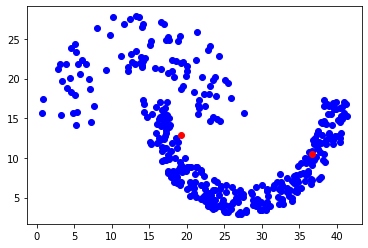

avg [35.08417266  9.14820144]
avg [17.94294872 13.9267094 ]


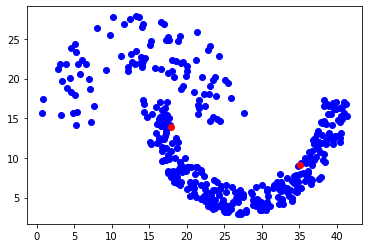

avg [33.9009434   8.57295597]
avg [17.22009346 14.80070093]


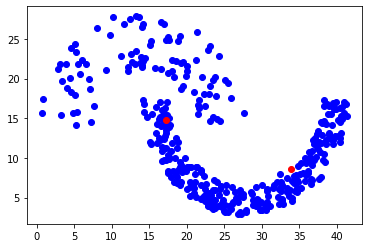

avg [32.93664773  8.28380682]
avg [16.64213198 15.5964467 ]


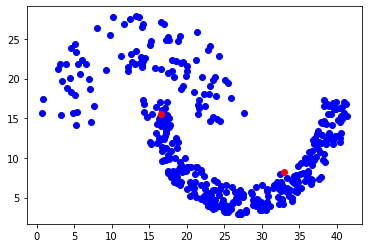

avg [32.32967914  8.12005348]
avg [16.28870968 16.19354839]


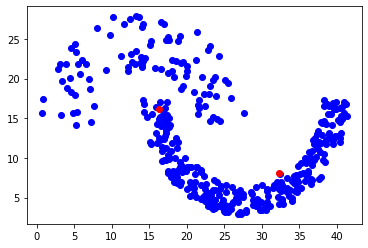

avg [32.16368421  8.09394737]
avg [16.19808743 16.35300546]


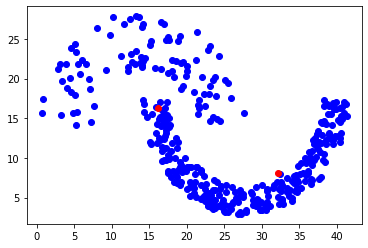

avg [32.10497382  8.08062827]
avg [16.17197802 16.41236264]


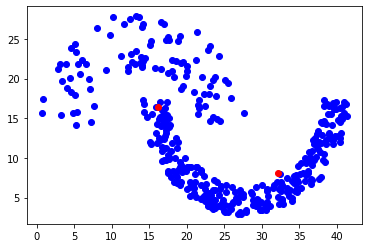

avg [32.04427083  8.06536458]
avg [16.14834254 16.47458564]


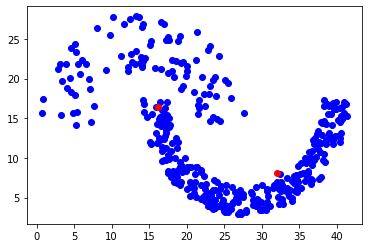

avg [31.98678756  8.05569948]
avg [16.12166667 16.53166667]


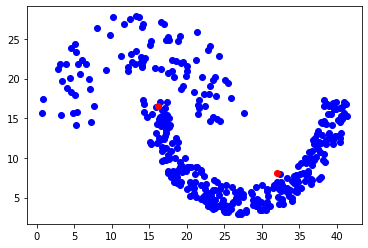

avg [31.93479381  8.0564433 ]
avg [16.08938547 16.57821229]


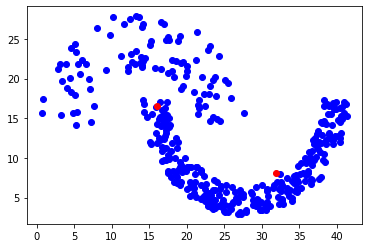

In [202]:
model = km.fit(x)

In [203]:
predicted = km.predict(x)

In [204]:
df['y']= [i for i in predicted]

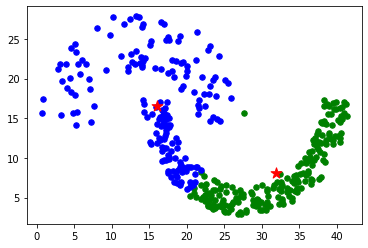

In [205]:

colors = {'0':'green','1':'blue'}
for classification in [0,1]:
    color = colors[str(classification)]
    for features in df[df['y']==classification].values:
        plt.scatter(features[0], features[1], color = color,s = 30)
plt.scatter(model[0][0], model[0][1], s = 130, marker = "*", color = 'red')
plt.scatter(model[1][0], model[1][1], s = 130, marker = "*",  color = 'red')

In [206]:
def kmeans_evalution(data):
    two = data[data['target']==2]['y'].value_counts().reset_index().values[0][0]
    one = data[data['target']==1]['y'].value_counts().reset_index().values[0][0]
    class1 = data[(data['target']==2) & (data['y']==two)].shape[0]
    class2 = data[(data['target']==1) & (data['y']==one)].shape[0]
    total = class1+class2
    print('accuracy: ',total/data.shape[0])

In [207]:
kmeans_evalution(df)

accuracy:  0.774798927613941


In [208]:
class spectralcluster():
    
    def __init__(self, k, max_iterations):
        self.k = k
        self.max_iterations = max_iterations
    
    def fit_predict(self,array):
        distance_mtx = np.zeros([array.shape[0],array.shape[0]])
        for i in range(0,array.shape[0]):
            for j in range(0,array.shape[0]):
                distance = np.exp(-(np.sqrt(np.sum((array[i]-array[j])**2)))**2/2)
                distance_mtx[i][j] = distance
        degree_mtx = np.diag(np.sum(distance_mtx, axis=1))
        laplacian_mtx = degree_mtx-distance_mtx
        eigen_value, eigen_vector = np.linalg.eig(laplacian_mtx)
        indx = np.argsort(eigen_value)[:self.k]
        xe=eigen_vector[:,indx]
        km = kmeans(k=self.k,max_iterations=self.max_iterations)
        kmean = km.fit(xe)
        predicted = km.predict(xe)
        return predicted, xe, kmean

In [209]:
sp_clus = spectralcluster(k=2,max_iterations=10)

avg [-0.05177804 -0.0286508 ]
avg [-0.05177804  0.01213831]


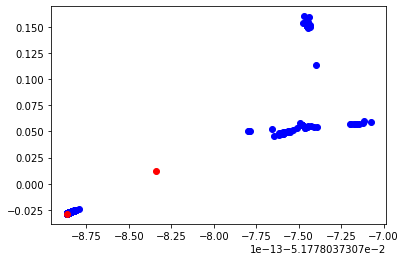

avg [-0.05177804 -0.0276227 ]
avg [-0.05177804  0.07859655]


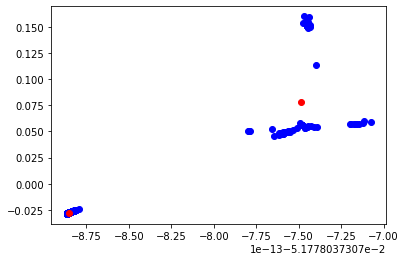

avg [-0.05177804 -0.0276227 ]
avg [-0.05177804  0.07859655]


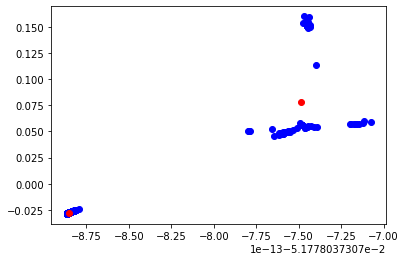

avg [-0.05177804 -0.0276227 ]
avg [-0.05177804  0.07859655]


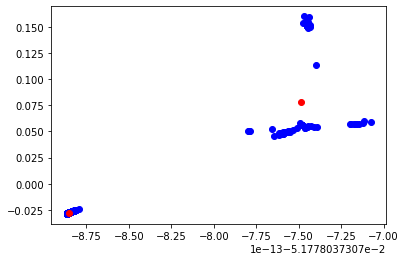

avg [-0.05177804 -0.0276227 ]
avg [-0.05177804  0.07859655]


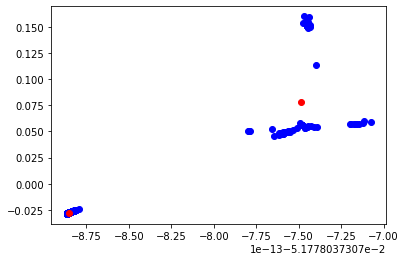

avg [-0.05177804 -0.0276227 ]
avg [-0.05177804  0.07859655]


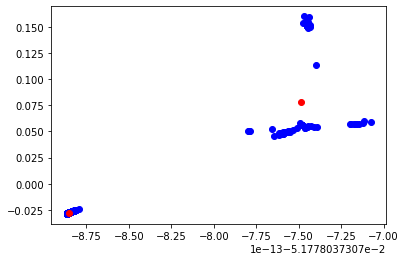

avg [-0.05177804 -0.0276227 ]
avg [-0.05177804  0.07859655]


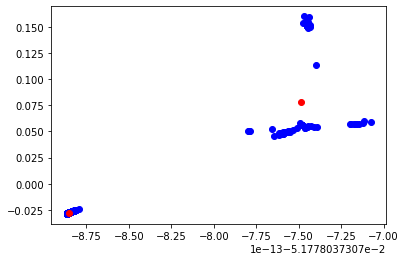

avg [-0.05177804 -0.0276227 ]
avg [-0.05177804  0.07859655]


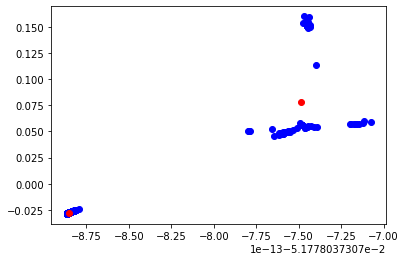

avg [-0.05177804 -0.0276227 ]
avg [-0.05177804  0.07859655]


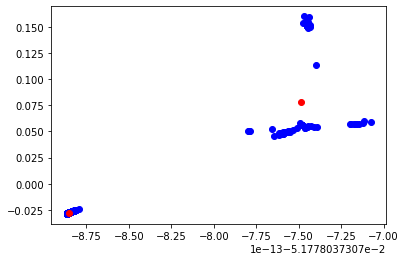

avg [-0.05177804 -0.0276227 ]
avg [-0.05177804  0.07859655]


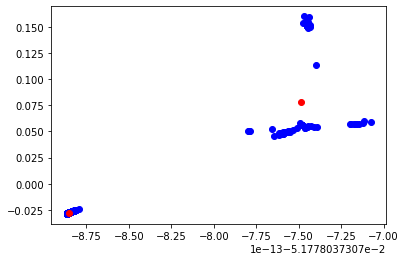

In [210]:
pred, vector, model = sp_clus.fit_predict(x)

In [211]:
df['spectral'] = pred

In [212]:
model

[array([-0.05177804, -0.0276227 ]), array([-0.05177804,  0.07859655])]

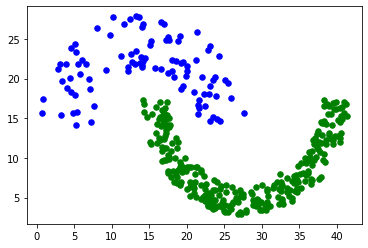

In [213]:
import matplotlib.pyplot as plt
colors = {'0':'green','1':'blue'}
for classification in [0,1]:
    color = colors[str(classification)]
    for features in df[df['spectral']==classification].values:
        plt.scatter(features[0], features[1], color = color,s = 30)

In [214]:
def spectral_evalution(data):
    two = data[data['target']==2]['spectral'].value_counts().reset_index().values[0][0]
    one = data[data['target']==1]['spectral'].value_counts().reset_index().values[0][0]
    class1 = data[(data['target']==2) & (data['spectral']==two)].shape[0]
    class2 = data[(data['target']==1) & (data['spectral']==one)].shape[0]
    total = class1+class2
    print('accuracy for spectral clustering: ',total/data.shape[0])

In [215]:
spectral_evalution(df)

accuracy for spectral clustering:  1.0


In [248]:
from sklearn.datasets import load_iris

In [256]:
iris = load_iris()
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

In [257]:
df.shape

(150, 5)

In [258]:
x = iris['data']

In [259]:
y = iris['target']

In [260]:
sp_clus = spectralcluster(k=3,max_iterations=10)

avg [-0.08164966 -0.03698292  0.02852759]
avg [-0.08164966  0.04868398 -0.0521191 ]
avg [-0.08164966  0.05906324 -0.03146394]


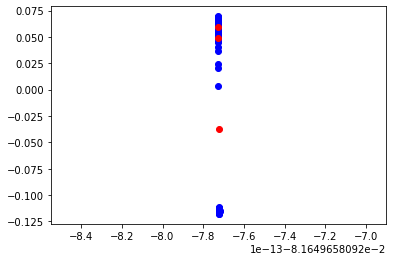

avg [-0.08164966 -0.09537878  0.04073922]
avg [-0.08164966  0.04705568 -0.0542365 ]
avg [-0.08164966  0.06035971 -0.01341281]


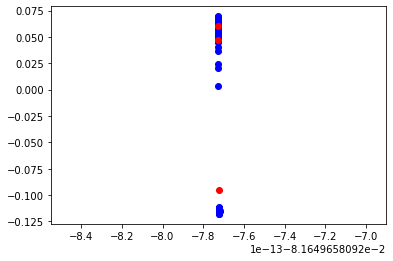

avg [-0.08164966 -0.10136882  0.03631296]
avg [-0.08164966  0.05022514 -0.04966478]
avg [-0.08164966  0.06109685 -0.0028828 ]


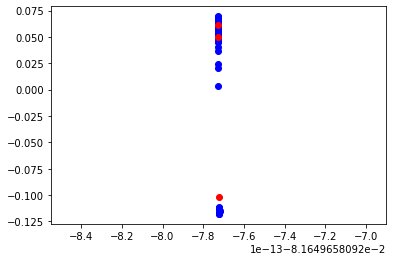

avg [-0.08164966 -0.10456164  0.03185224]
avg [-0.08164966  0.05330894 -0.04333987]
avg [-0.08164966  0.0621375   0.01656009]


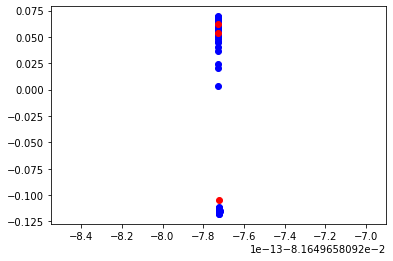

avg [-0.08164966 -0.11498635  0.00462014]
avg [-0.08164966  0.05464616 -0.03922332]
avg [-0.08164966  0.06354308  0.07613058]


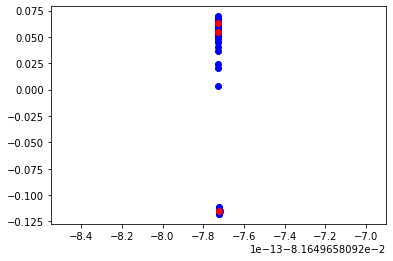

avg [-0.08164966 -0.11498635  0.00462014]
avg [-0.08164966  0.05617123 -0.0311358 ]
avg [-0.08164966  0.06561368  0.17476225]


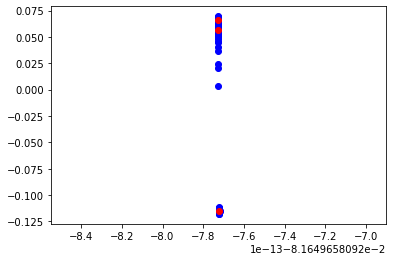

avg [-0.08164966 -0.11498635  0.00462014]
avg [-0.08164966  0.05664525 -0.02661595]
avg [-0.08164966  0.06724436  0.27720757]


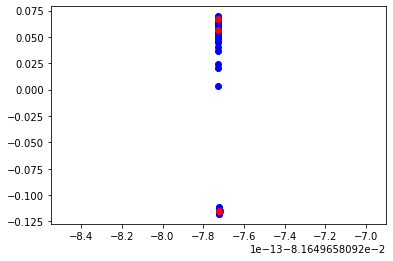

avg [-0.08164966 -0.11498635  0.00462014]
avg [-0.08164966  0.05691528 -0.02273068]
avg [-0.08164966  0.06847327  0.38568146]


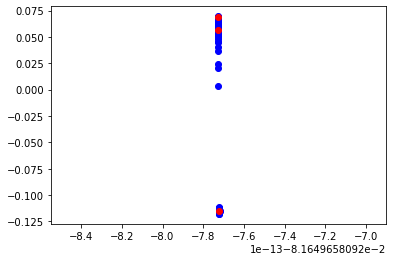

avg [-0.08164966 -0.11498635  0.00462014]
avg [-0.08164966  0.05691528 -0.02273068]
avg [-0.08164966  0.06847327  0.38568146]


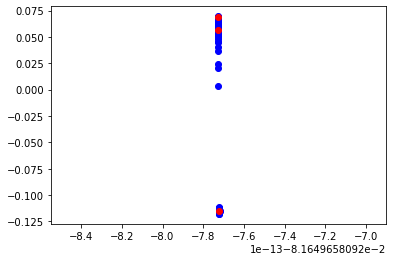

avg [-0.08164966 -0.11498635  0.00462014]
avg [-0.08164966  0.05691528 -0.02273068]
avg [-0.08164966  0.06847327  0.38568146]


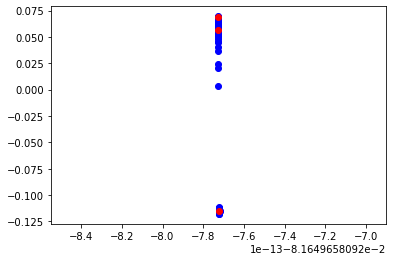

In [261]:
pred, vector, model = sp_clus.fit_predict(x)

In [265]:
df['spectral'] = pred

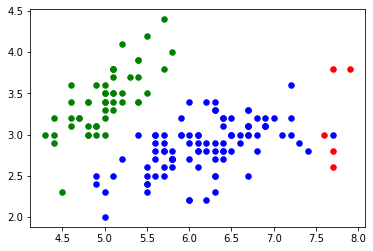

In [266]:
import matplotlib.pyplot as plt
colors = {'0':'green','1':'blue','2':'red'}
for classification in [0,1,2]:
    color = colors[str(classification)]
    for features in df[df['spectral']==classification].values:
        plt.scatter(features[0], features[1], color = color,s = 30)

In [267]:
df[df['target']==2.0]['spectral'].value_counts()

1    45
2     5
Name: spectral, dtype: int64

In [268]:
def spectral_evalution(data):
    two = data[data['target']==2.0]['spectral'].value_counts().reset_index().values[1][0]
    one = data[data['target']==1.0]['spectral'].value_counts().reset_index().values[0][0]
    zero = data[data['target']==0.0]['spectral'].value_counts().reset_index().values[0][0]
    class1 = data[(data['target']==2.0) & (data['spectral']==two)].shape[0]
    class2 = data[(data['target']==1.0) & (data['spectral']==one)].shape[0]
    class3 = data[(data['target']==0.0) & (data['spectral']==zero)].shape[0]
    total = class1+class2+class3
    print('accuracy for spectral clustering: ',total/data.shape[0])

spectral_evalution(df)

accuracy for spectral clustering:  0.7


In [269]:
class PCA():
    def __init__(self, n_features):
        self.n_features = n_features
    
    def fit_transform(self,array):
        array_mean = array-np.mean(array,axis=0) 
        cov_mtx = np.cov(array_mean,rowvar=False)
        eigen_value, eigen_vector = np.linalg.eig(cov_mtx)
        indx = np.argsort(eigen_value)[-self.n_features:]
        eigen_vector = eigen_vector[:,indx]
        return np.dot(eigen_vector.T,array_mean.T).T, eigen_vector

In [270]:
pca = PCA(n_features=2)

In [271]:
x_pca, pca_vector = pca.fit_transform(x)

In [272]:
x_pca.shape

(150, 2)

In [273]:
sp_clus = spectralcluster(k=3,max_iterations=10)

avg [-0.08164966  0.05420394  0.04284886]
avg [-0.08164966 -0.04601238 -0.0060187 ]
avg [-0.08164966  0.06665361 -0.30289248]


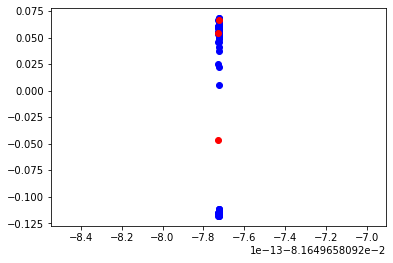

avg [-0.08164966  0.05690599  0.02388534]
avg [-0.08164966 -0.1114916  -0.00678977]
avg [-0.08164966  0.06738162 -0.37978877]


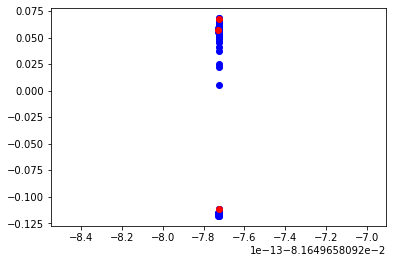

avg [-0.08164966  0.05699145  0.02236561]
avg [-0.08164966 -0.11502192 -0.00451578]
avg [-0.08164966  0.06738162 -0.37978877]


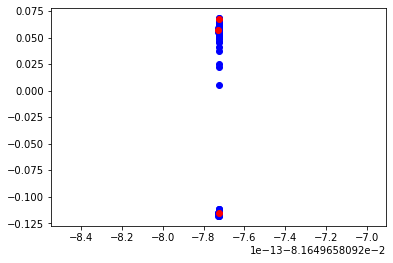

avg [-0.08164966  0.05699145  0.02236561]
avg [-0.08164966 -0.11502192 -0.00451578]
avg [-0.08164966  0.06738162 -0.37978877]


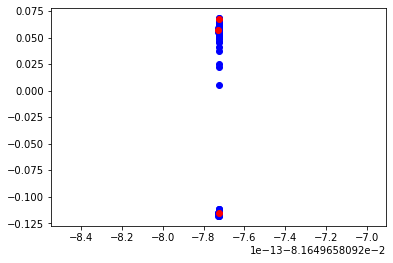

avg [-0.08164966  0.05699145  0.02236561]
avg [-0.08164966 -0.11502192 -0.00451578]
avg [-0.08164966  0.06738162 -0.37978877]


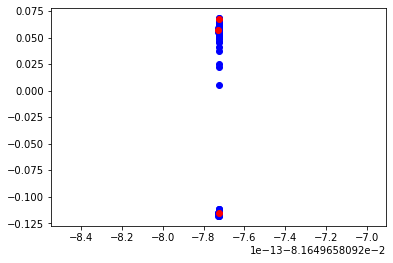

avg [-0.08164966  0.05699145  0.02236561]
avg [-0.08164966 -0.11502192 -0.00451578]
avg [-0.08164966  0.06738162 -0.37978877]


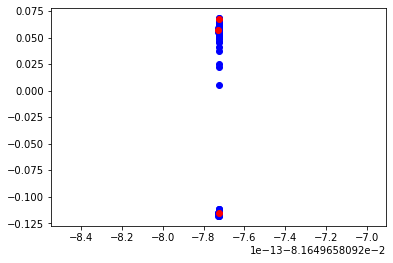

avg [-0.08164966  0.05699145  0.02236561]
avg [-0.08164966 -0.11502192 -0.00451578]
avg [-0.08164966  0.06738162 -0.37978877]


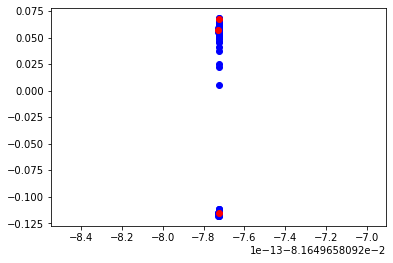

avg [-0.08164966  0.05699145  0.02236561]
avg [-0.08164966 -0.11502192 -0.00451578]
avg [-0.08164966  0.06738162 -0.37978877]


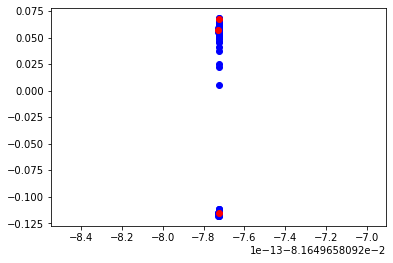

avg [-0.08164966  0.05699145  0.02236561]
avg [-0.08164966 -0.11502192 -0.00451578]
avg [-0.08164966  0.06738162 -0.37978877]


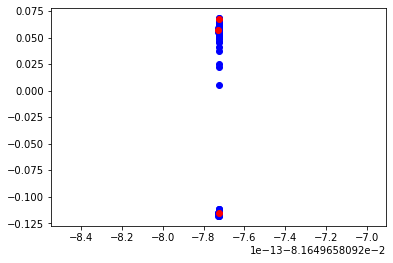

avg [-0.08164966  0.05699145  0.02236561]
avg [-0.08164966 -0.11502192 -0.00451578]
avg [-0.08164966  0.06738162 -0.37978877]


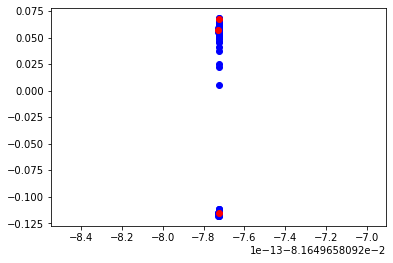

In [274]:
pred, vector, model = sp_clus.fit_predict(x_pca)

In [275]:
df['spectral'] = pred

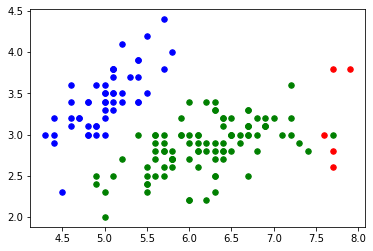

In [276]:
import matplotlib.pyplot as plt
colors = {'0':'green','1':'blue','2':'red'}
for classification in [0,1,2]:
    color = colors[str(classification)]
    for features in df[df['spectral']==classification].values:
        plt.scatter(features[0], features[1], color = color,s = 30)

In [277]:
df[df['target']==1.0]['spectral'].value_counts()

0    50
Name: spectral, dtype: int64

In [278]:
def spectral_evalution(data):
    two = data[data['target']==2.0]['spectral'].value_counts().reset_index().values[1][0]
    one = data[data['target']==1.0]['spectral'].value_counts().reset_index().values[0][0]
    zero = data[data['target']==0.0]['spectral'].value_counts().reset_index().values[0][0]
    class1 = data[(data['target']==2.0) & (data['spectral']==two)].shape[0]
    class2 = data[(data['target']==1.0) & (data['spectral']==one)].shape[0]
    class3 = data[(data['target']==0.0) & (data['spectral']==zero)].shape[0]
    total = class1+class2+class3
    print('accuracy for spectral clustering: ',total/data.shape[0])

spectral_evalution(df)

accuracy for spectral clustering:  0.7


In [280]:
for i in [1,2,3]:
    pca = PCA(n_features=i)
    x_pca, pca_vector = pca.fit_transform(x)
    vw = np.dot(x_pca,pca_vector.T)
    uwx = np.dot(vw,pca_vector)
    nrm = np.linalg.norm(x_pca - uwx)
    print('The reconstruction loss for dimension',i, nrm*nrm)

The reconstruction loss for dimension 1 1.067971788513025e-29
The reconstruction loss for dimension 2 2.2273138463742227e-28
The reconstruction loss for dimension 3 5.7582540724928495e-28
